# NLP Basic Assignment
## 과제 : spam.csv를 활용하여 유의미한 해석을 도출해주세요!

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Load Data
- 보시면 아시다시피 spam.csv는 라벨이 있는 데이터입니다.
- 7주차 주제가 텍스트 기초인만큼 텍스트만 활용하셔도 되고 라벨까지 활용하셔서 모델을 돌려보셔도 좋습니다.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
spam = pd.read_csv('/content/drive/MyDrive/Tobigs/Week7/spam.csv')

In [13]:
spam.iloc[5]['v2']

"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"

In [14]:
spam

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [15]:
spam['v1'] = spam['v1'].replace(['ham','spam'],[0,1])

<Axes: >

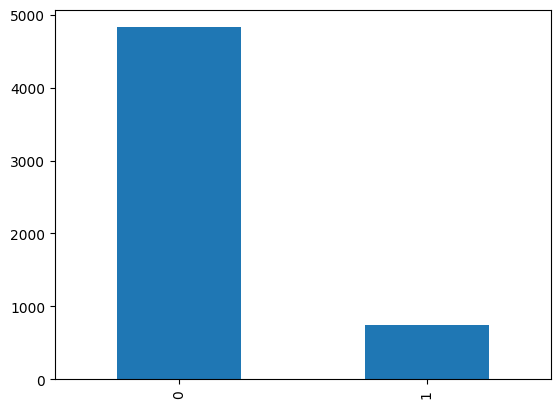

In [16]:
spam['v1'].value_counts().plot(kind='bar')

In [17]:
print('정상 메일과 스팸 메일의 개수')
print(spam.groupby('v1').size().reset_index(name='count'))

정상 메일과 스팸 메일의 개수
   v1  count
0   0   4825
1   1    747


In [18]:
print(f'정상 메일의 비율 = {round(spam["v1"].value_counts()[0]/len(spam) * 100,3)}%')
print(f'스팸 메일의 비율 = {round(spam["v1"].value_counts()[1]/len(spam) * 100,3)}%')

정상 메일의 비율 = 86.594%
스팸 메일의 비율 = 13.406%


## Tokenizing


In [19]:
import nltk

In [20]:
# 예시 코드 코드
from nltk.tokenize import word_tokenize

nltk.download('punkt')
word_tokenize(spam.iloc[5]['v2'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['FreeMsg',
 'Hey',
 'there',
 'darling',
 'it',
 "'s",
 'been',
 '3',
 'week',
 "'s",
 'now',
 'and',
 'no',
 'word',
 'back',
 '!',
 'I',
 "'d",
 'like',
 'some',
 'fun',
 'you',
 'up',
 'for',
 'it',
 'still',
 '?',
 'Tb',
 'ok',
 '!',
 'XxX',
 'std',
 'chgs',
 'to',
 'send',
 ',',
 'å£1.50',
 'to',
 'rcv']

In [21]:
from nltk.tokenize import WordPunctTokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from nltk.tokenize import TreebankWordTokenizer
from nltk.tokenize import sent_tokenize

In [22]:
print(word_tokenize(spam.iloc[5]['v2']))

['FreeMsg', 'Hey', 'there', 'darling', 'it', "'s", 'been', '3', 'week', "'s", 'now', 'and', 'no', 'word', 'back', '!', 'I', "'d", 'like', 'some', 'fun', 'you', 'up', 'for', 'it', 'still', '?', 'Tb', 'ok', '!', 'XxX', 'std', 'chgs', 'to', 'send', ',', 'å£1.50', 'to', 'rcv']


In [23]:
print(WordPunctTokenizer().tokenize(spam.iloc[5]['v2']))

['FreeMsg', 'Hey', 'there', 'darling', 'it', "'", 's', 'been', '3', 'week', "'", 's', 'now', 'and', 'no', 'word', 'back', '!', 'I', "'", 'd', 'like', 'some', 'fun', 'you', 'up', 'for', 'it', 'still', '?', 'Tb', 'ok', '!', 'XxX', 'std', 'chgs', 'to', 'send', ',', 'å', '£', '1', '.', '50', 'to', 'rcv']


In [24]:
print(text_to_word_sequence(spam.iloc[5]['v2']))

['freemsg', 'hey', 'there', 'darling', "it's", 'been', '3', "week's", 'now', 'and', 'no', 'word', 'back', "i'd", 'like', 'some', 'fun', 'you', 'up', 'for', 'it', 'still', 'tb', 'ok', 'xxx', 'std', 'chgs', 'to', 'send', 'å£1', '50', 'to', 'rcv']


In [25]:
print(TreebankWordTokenizer().tokenize(spam.iloc[5]['v2']))

['FreeMsg', 'Hey', 'there', 'darling', 'it', "'s", 'been', '3', 'week', "'s", 'now', 'and', 'no', 'word', 'back', '!', 'I', "'d", 'like', 'some', 'fun', 'you', 'up', 'for', 'it', 'still', '?', 'Tb', 'ok', '!', 'XxX', 'std', 'chgs', 'to', 'send', ',', 'å£1.50', 'to', 'rcv']


여러 라이브러리의 토큰화를 진행해 보았다.
스팸 메세지의 분류는 보통 문맥보단 단어의 의미가 더 중요하므로 분류 모델을 생성할 때 케라스의 text_to_sequence를 이용하여 아포스트로피는 보존하면서, 모든 알파벳을 소문자로 바꾸면서 마침표나 느낌표 등의 구두점을 제거해주는 것이 좋겠다.

## Embedding

- 수업에서 다룬 임베딩 방법에는 One-hot encoding, CBOW, Skip-gram 등이 있었습니다. 다양한 시도와 '비교' 결과를 함께 적어주세요! 파라미터를 조정해가는 과정도 해석에 도움이 될 수 있겠죠 :)

One-hot Encoding

In [26]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

tokenizer = Tokenizer()
tokenizer.fit_on_texts([spam.iloc[5]['v2']])
print(tokenizer.word_index)

encoded = tokenizer.texts_to_sequences([spam.iloc[5]['v2']])[0]
print(encoded)

one_hot = to_categorical(encoded)
print(one_hot)

{'to': 1, 'freemsg': 2, 'hey': 3, 'there': 4, 'darling': 5, "it's": 6, 'been': 7, '3': 8, "week's": 9, 'now': 10, 'and': 11, 'no': 12, 'word': 13, 'back': 14, "i'd": 15, 'like': 16, 'some': 17, 'fun': 18, 'you': 19, 'up': 20, 'for': 21, 'it': 22, 'still': 23, 'tb': 24, 'ok': 25, 'xxx': 26, 'std': 27, 'chgs': 28, 'send': 29, 'å£1': 30, '50': 31, 'rcv': 32}
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 1, 29, 30, 31, 1, 32]
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


CBOW, Skip-gram


In [27]:
spam['v2']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

In [28]:
result = [text_to_word_sequence(sentence) for sentence in spam['v2']]

In [29]:
print('총 샘플의 개수 : {}'.format(len(result)))

총 샘플의 개수 : 5572


In [30]:
for line in result[:3]:
    print(line)

['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat']
['ok', 'lar', 'joking', 'wif', 'u', 'oni']
['free', 'entry', 'in', '2', 'a', 'wkly', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', '2005', 'text', 'fa', 'to', '87121', 'to', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 't', "c's", 'apply', "08452810075over18's"]


In [31]:
import gensim

In [32]:
CBOW_model = gensim.models.Word2Vec(sentences=result, window=3, min_count=3, workers=4, sg=0)

In [33]:
CBOW_model.wv.vectors.shape

(2986, 100)

In [34]:
CBOW_model_result = CBOW_model.wv.most_similar("go")
print(CBOW_model_result)

[('get', 0.9990544319152832), ('him', 0.9990370869636536), ('meet', 0.9990288019180298), ('went', 0.998960018157959), ('already', 0.9989333748817444), ('ask', 0.9989311695098877), ('they', 0.9988967180252075), ('find', 0.9988776445388794), ('again', 0.9988757967948914), ('try', 0.9988585710525513)]


In [35]:
SG_model = gensim.models.Word2Vec(sentences=result, window=3, min_count=3, workers=4, sg=1)
SG_model_result = SG_model.wv.most_similar("go")
print(SG_model_result)

[('wan', 0.9607821702957153), ('meet', 0.9375656247138977), ('ì', 0.923784613609314), ('dun', 0.9223045110702515), ('him', 0.9104715585708618), ('ask', 0.9093098044395447), ('wat', 0.9042374491691589), ('lar', 0.9017014503479004), ('then', 0.897002100944519), ('pick', 0.8968185782432556)]


In [36]:
SG_model.wv.vectors.shape

(2986, 100)

## 본인이 도출해낸 해석을 적어주세요!

- 유사도, Wordcloud, 이진 분류 모델, Plot 뭐든 상관없으니 분명하고 인상적인 해석을 적어주시면 됩니다.

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(spam['v2'], spam['v1'], test_size=0.2, stratify=spam['v1'])

In [38]:
print('-----------훈련 데이터의 비율-----------')
print(f'정상 메일 = {round(y_train.value_counts()[0]/len(y_train) * 100,3)}%')
print(f'스팸 메일 = {round(y_train.value_counts()[1]/len(y_train) * 100,3)}%')

-----------훈련 데이터의 비율-----------
정상 메일 = 86.583%
스팸 메일 = 13.417%


In [39]:
print('-----------테스트 데이터의 비율-----------')
print(f'정상 메일 = {round(y_test.value_counts()[0]/len(y_test) * 100,3)}%')
print(f'스팸 메일 = {round(y_test.value_counts()[1]/len(y_test) * 100,3)}%')

-----------테스트 데이터의 비율-----------
정상 메일 = 86.637%
스팸 메일 = 13.363%


In [49]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_encoded = tokenizer.texts_to_sequences(X_train)
X_test_encoded = tokenizer.texts_to_sequences(X_test)
print(X_train_encoded[:5])

[[149, 49, 20, 58, 528, 7, 2556, 3816, 1675, 12, 102, 2, 632, 117, 5, 2557, 3817, 465, 2558], [31, 633, 18, 747, 350, 2, 59, 12, 634], [37, 3818, 104, 1, 17, 145, 392, 47, 3, 7, 635, 466, 1, 60, 3819, 8, 5, 501, 636, 8, 4, 2559, 267, 37, 933, 150, 68, 137, 34, 124, 3820, 15, 25, 74, 3821, 25, 3822, 45, 362, 65, 3823, 2, 49, 212, 12, 185, 1435, 3824], [855, 1, 604, 6, 796, 414, 174, 574, 280, 856, 147], [3825, 1676, 26, 31, 74, 2, 28, 2560, 1, 502, 56, 4, 140, 2, 186, 131, 479, 58]]


In [41]:
word_to_index = tokenizer.word_index
print(word_to_index)

{'i': 1, 'to': 2, 'you': 3, 'a': 4, 'the': 5, 'u': 6, 'and': 7, 'in': 8, 'is': 9, 'me': 10, 'my': 11, 'for': 12, 'your': 13, 'it': 14, 'of': 15, 'call': 16, 'have': 17, 'that': 18, '2': 19, 'on': 20, 'now': 21, 'are': 22, 'so': 23, 'but': 24, 'not': 25, 'do': 26, 'can': 27, 'at': 28, 'get': 29, 'or': 30, "i'm": 31, 'if': 32, 'will': 33, 'be': 34, 'just': 35, 'with': 36, 'no': 37, 'ur': 38, 'we': 39, 'this': 40, 'gt': 41, 'lt': 42, '4': 43, 'up': 44, 'when': 45, 'ok': 46, 'from': 47, 'how': 48, 'go': 49, 'out': 50, 'what': 51, 'all': 52, 'free': 53, 'know': 54, 'like': 55, 'got': 56, 'good': 57, 'then': 58, 'come': 59, 'am': 60, 'was': 61, 'time': 62, 'day': 63, 'love': 64, 'its': 65, 'only': 66, 'send': 67, 'there': 68, 'text': 69, 'want': 70, 'one': 71, 'he': 72, 'by': 73, 'going': 74, 'as': 75, 'home': 76, "i'll": 77, 'need': 78, 'txt': 79, 'sorry': 80, 'about': 81, 'lor': 82, 'still': 83, 'r': 84, 'n': 85, 'back': 86, 'today': 87, 'hi': 88, 'k': 89, 'stop': 90, 'da': 91, 'see': 92, 

In [50]:
threshold = 2
total_cnt = len(word_to_index)
rare_cnt = 0
total_freq = 0
rare_freq = 0

for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    if (value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s' %(threshold - 1, rare_cnt))
print("단어 집합(vocabulary)에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

등장 빈도가 1번 이하인 희귀 단어의 수: 4134
단어 집합(vocabulary)에서 희귀 단어의 비율: 52.00654170335891
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 5.865576980377134


In [43]:
vocab_size = len(word_to_index) + 1
print('단어 집합의 크기: {}'.format((vocab_size)))

단어 집합의 크기: 7950


메일의 최대 길이 : 189
메일의 평균 길이 : 15.813103


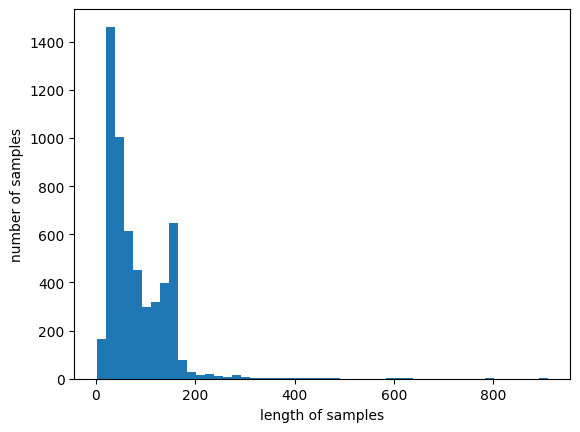

In [44]:
print('메일의 최대 길이 : %d' % max((len(sample)) for sample in X_train_encoded))
print('메일의 평균 길이 : %f' % (sum(map(len, X_train_encoded))/len(X_train_encoded)))

plt.hist([len(sample) for sample in spam['v2']], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [52]:
max_len = 189
X_train_padded = pad_sequences(X_train_encoded, maxlen = max_len)
X_test_padded = pad_sequences(X_test_encoded, maxlen = max_len)
print("훈련 데이터의 크기(shape):", X_train_padded.shape)
print("검증 데이터의 크기(shape):", X_test_padded.shape)

훈련 데이터의 크기(shape): (4457, 189)
검증 데이터의 크기(shape): (1115, 189)


LSTM을 이용한 스팸 데이터 이진 분류를 시행하였다.

In [53]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential

embedding_dim = 32
hidden_units = 32

model = Sequential()
model.add(Embedding(4000, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

In [54]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
model_check = ModelCheckpoint('the_best.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [63]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(X_train_padded, y_train, validation_data=(X_test_padded, y_test), epochs=1, batch_size=64, callbacks=[early_stop, model_check])

70/70 [==============================] - ETA: 0s - loss: 0.0879 - acc: 0.9809
Epoch 1: val_acc improved from 0.96502 to 0.98744, saving model to the_best.h5
70/70 [==============================] - 14s 171ms/step - loss: 0.0879 - acc: 0.9809 - val_loss: 0.0542 - val_acc: 0.9874


In [64]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test_padded, y_test)[1]))

35/35 [==============================] - 0s 7ms/step - loss: 0.0542 - acc: 0.9874

 테스트 정확도: 0.9874


최종족으로 검증 데이터에서 0.9874의 정확도를 얻었다.